In [ ]:
import pandas as pd
import numpy as np
import h5py
import transformers as T
import torch
import tqdm
from utils import *

np.random.seed(42)

In [ ]:
# load model
tokenizer = T.BertTokenizer.from_pretrained("./model/") 
model = load_model(tokenizer, "./model/model.bin") # xx

# load eCLIP coverage
data = h5py.File('./data/test.h5')
strand = data['strand']
dataset = SequenceDataset('./data/test.h5', tokenizer)

In [ ]:
# experimental coverage
experiment_coverage = (data['label'][:] * 1e4)/data['coverage'][:].reshape(-1,1) # cpm normalization
experiment_coverage = torch.as_tensor(experiment_coverage[:,1:-2], dtype=torch.float32) # we drop the edge base
experiment_coverage = experiment_coverage.abs()
for i in range(len(experiment_coverage)): 
    if strand[i] == b'-': # reverse complement
        experiment_coverage[i] = experiment_coverage[i].flipud() # flip up-to-down

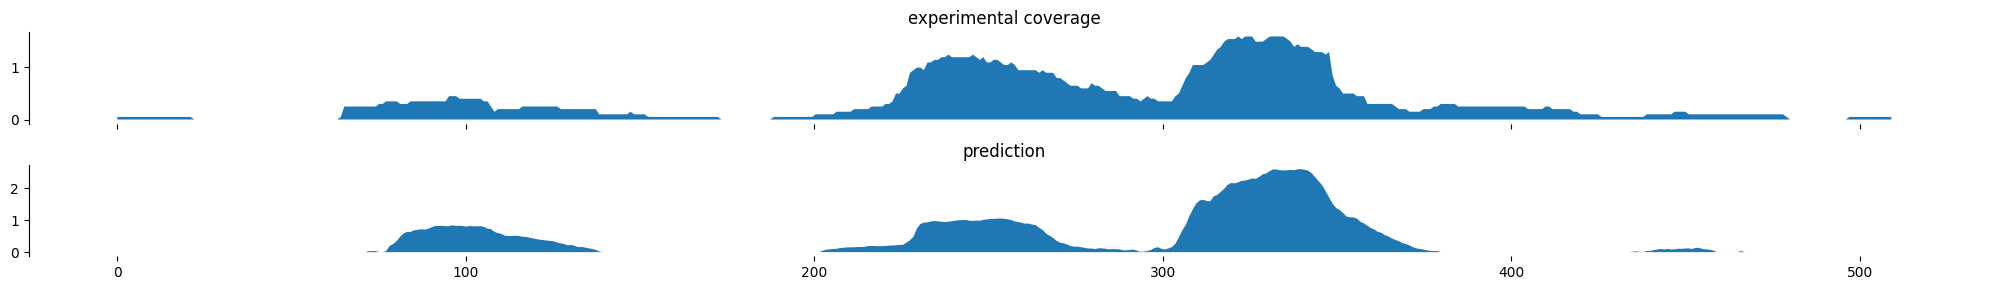

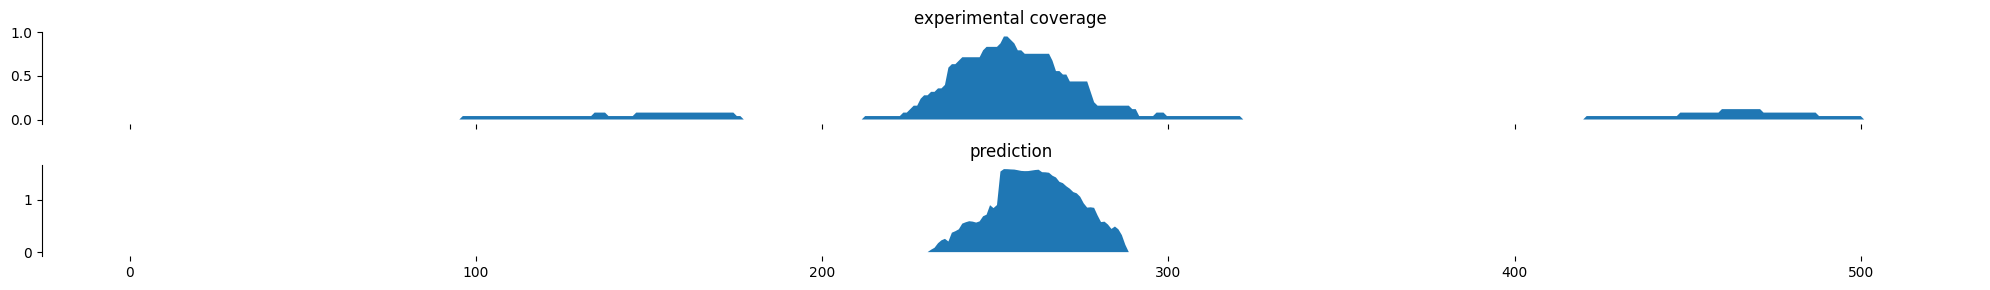

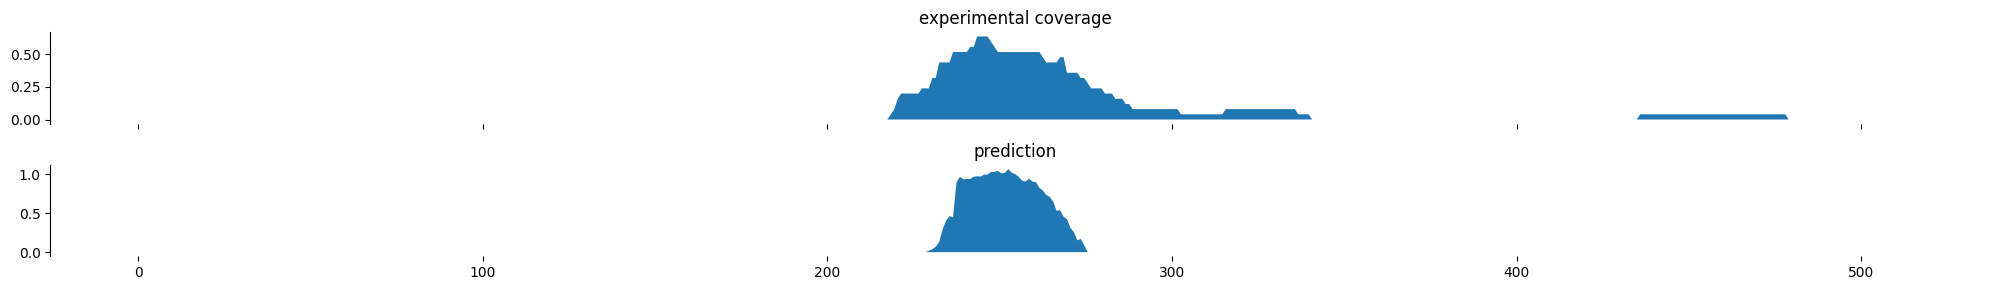

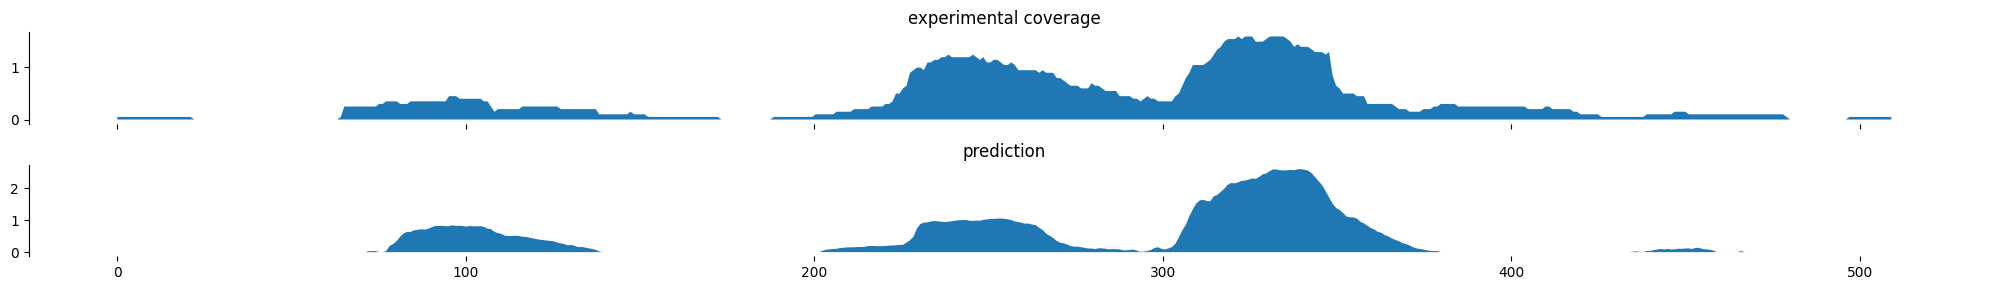

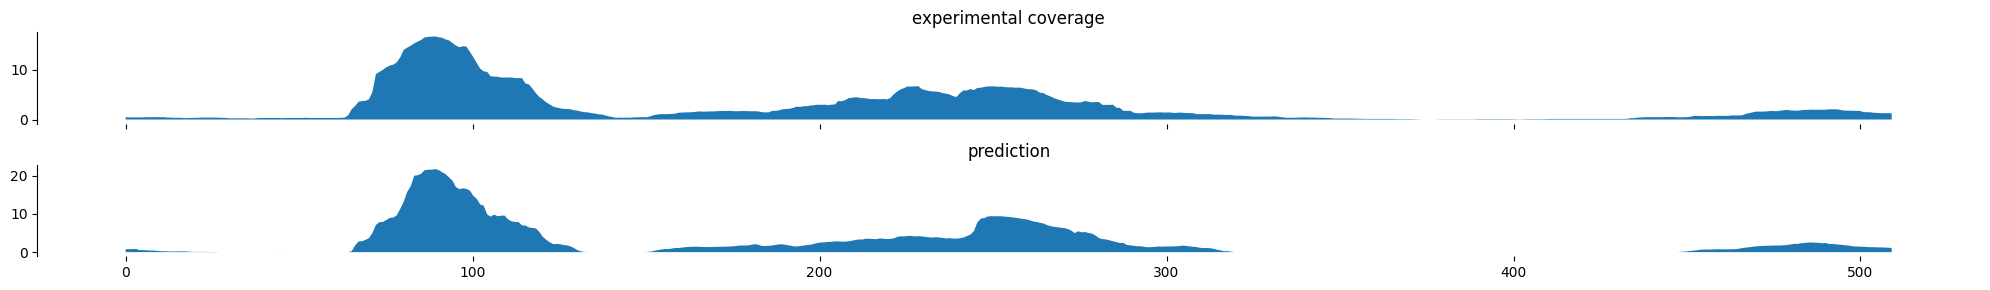

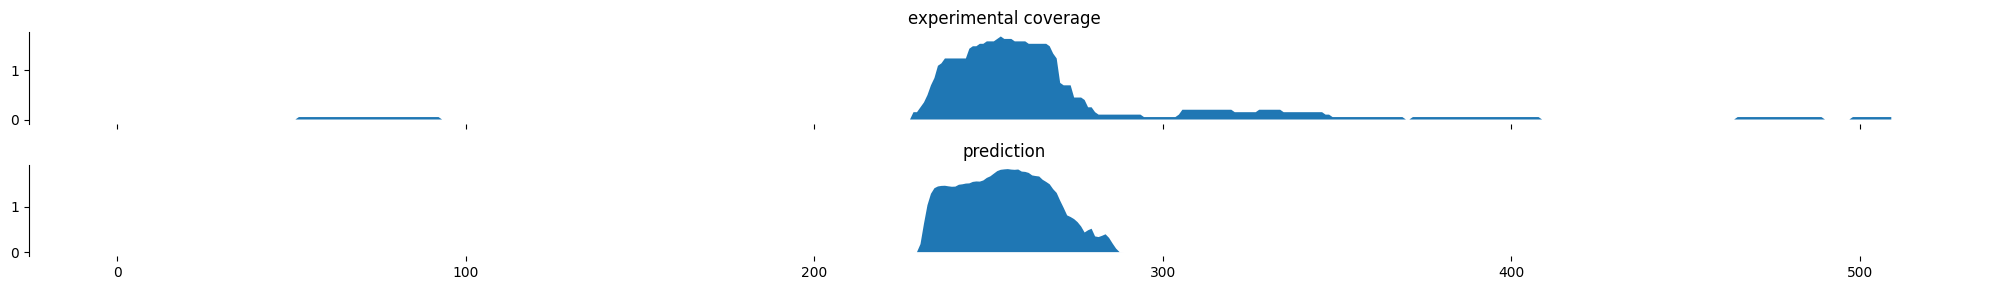

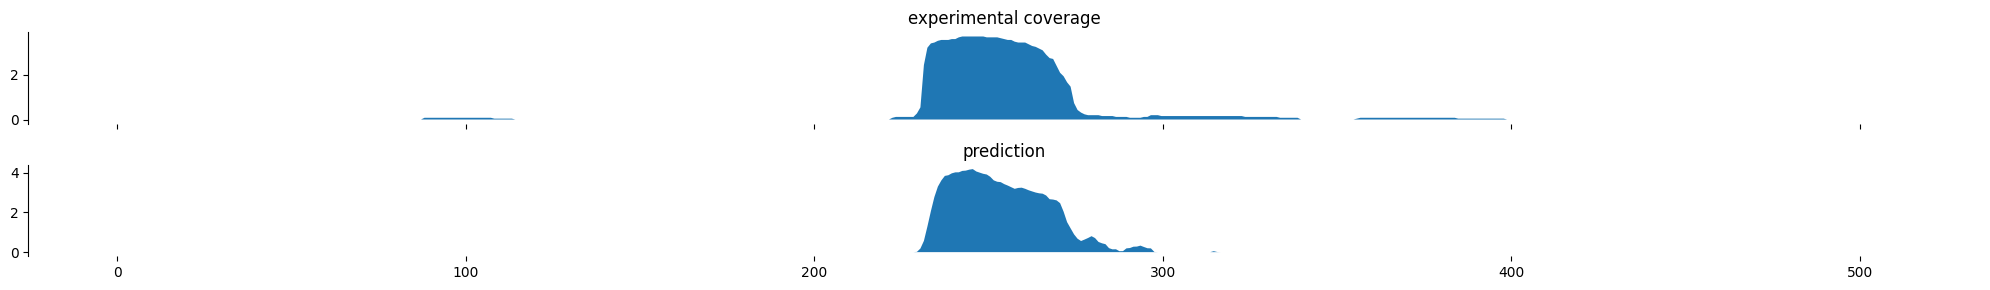

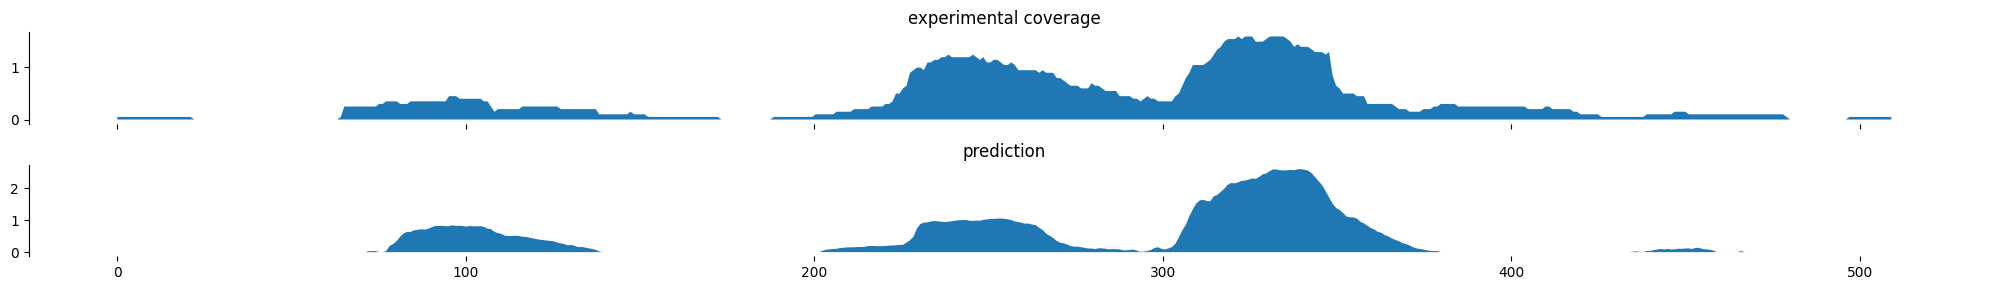

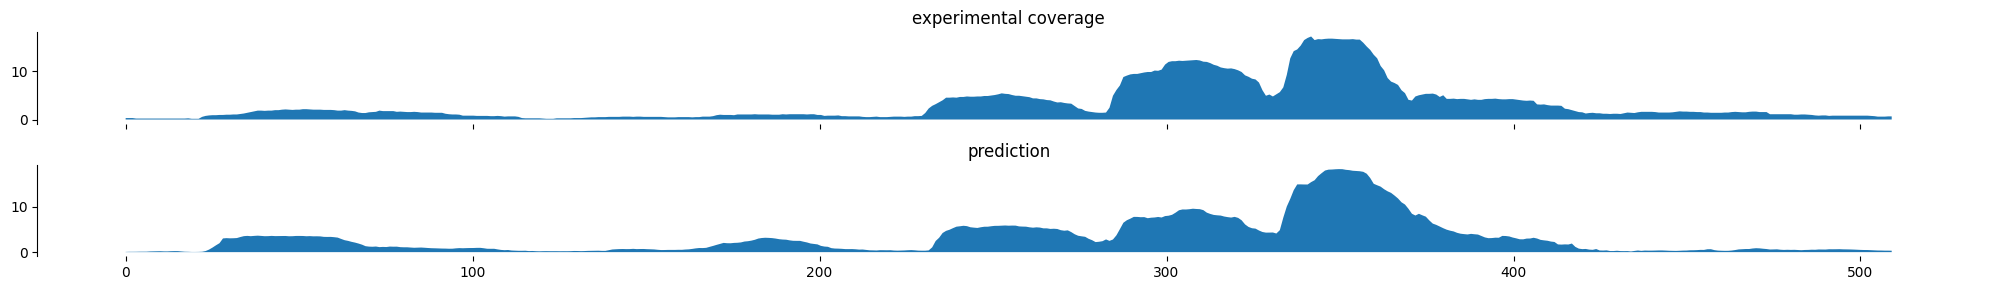

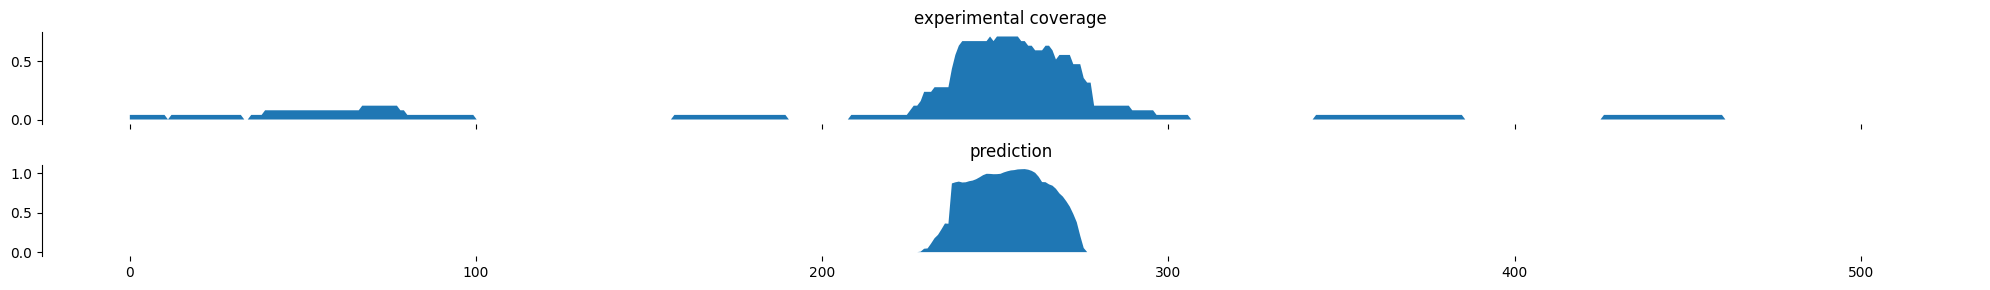

In [5]:
## prediction
for idx in np.random.choice(np.arange(len(dataset)),10): # we randomly chose 10 data for display
    inputs = dataset.__getitem__(idx)
    output = model(input_ids = inputs.unsqueeze(0).to(model.model.device))
    output = output.detach().cpu().numpy().squeeze()
    plot_tracks({'experimental coverage':experiment_coverage[idx], "prediction":output})